In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ! unzip '/content/drive/MyDrive/Speech Emotion recognition/train.zip' -d '/content/drive/MyDrive/Speech Emotion recognition/'

In [4]:
# ! unzip '/content/drive/MyDrive/Speech Emotion recognition/test.zip' -d '/content/drive/MyDrive/Speech Emotion recognition/'

#Load Data Feature Extraction and Preprossecing

In [5]:
import numpy as np
import pandas as pd

test_result = pd.read_csv('/content/drive/MyDrive/Speech Emotion recognition/result.csv')

In [6]:
test_result

,Id,label
0,2705F,N
1,2707M,H
2,2708F,N
3,2710M,A
4,2711M,A
...,...,...
222,2992M,S
223,2993M,N
224,2995M,N
225,2996F,W


In [7]:
#Parsing id gender and label from file name
def parser(name):
  meta = {}
  meta['id'] = name.split('.')[0][:-2]
  meta['gender'] = name.split('.')[0][-2]
  meta['label'] = name.split('.')[0][-1]
  return meta

In [8]:
import IPython

path = '/content/drive/MyDrive/Speech Emotion recognition/train/0014FW.wav'

IPython.display.Audio(path)


In [20]:
import os

file_names = os.listdir('/content/drive/MyDrive/Speech Emotion recognition/train')
test_file_names = os.listdir('/content/drive/MyDrive/Speech Emotion recognition/test')

In [54]:
file_names

['2387FN.wav',
 '1506MN.wav',
 '0951FA.wav',
 '1461FA.wav',
 '1625FS.wav',
 '1161MW.wav',
 '2050MN.wav',
 '1495FA.wav',
 '0238MH.wav',
 '0703MA.wav',
 '1174MA.wav',
 '1424MS.wav',
 '0400FN.wav',
 '2028MA.wav',
 '0936MA.wav',
 '1253MN.wav',
 '1390FN.wav',
 '1670FA.wav',
 '0595MH.wav',
 '1494FA.wav',
 '1455FH.wav',
 '2112MN.wav',
 '1278MS.wav',
 '2543MS.wav',
 '0782MW.wav',
 '1624MA.wav',
 '2127MA.wav',
 '0441MW.wav',
 '1572FW.wav',
 '0297MH.wav',
 '0169MN.wav',
 '0363FA.wav',
 '0495FA.wav',
 '0712FH.wav',
 '2107FS.wav',
 '1902MN.wav',
 '0062MA.wav',
 '1165MA.wav',
 '2393FS.wav',
 '0612MN.wav',
 '0445FN.wav',
 '1449FA.wav',
 '0053MN.wav',
 '1813MN.wav',
 '0104FA.wav',
 '2316MS.wav',
 '2652FS.wav',
 '2509FA.wav',
 '0928FN.wav',
 '1999MS.wav',
 '2569FA.wav',
 '2120MN.wav',
 '1973MH.wav',
 '2394MA.wav',
 '1992MN.wav',
 '1870MN.wav',
 '1732MW.wav',
 '0450MH.wav',
 '1701MN.wav',
 '1946MS.wav',
 '2362FN.wav',
 '1428MN.wav',
 '1928MA.wav',
 '0194MA.wav',
 '2301MA.wav',
 '2081MA.wav',
 '1795MA.w

In [22]:
import librosa

train_featurs = []
root = '/content/drive/MyDrive/Speech Emotion recognition/'

for file_name in file_names: 
  y, sr = librosa.load(root + 'train/' + file_name)
  mfccs = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=10)
  train_featurs.append(mfccs)

In [28]:
import librosa

test_featurs = []
root = '/content/drive/MyDrive/Speech Emotion recognition/'

for test_file_name in file_names: 
  y, sr = librosa.load(root + 'train/' + file_name)
  mfccs = librosa.feature.mfcc(y=y, sr=sr,n_mfcc=10)
  test_featurs.append(mfccs)

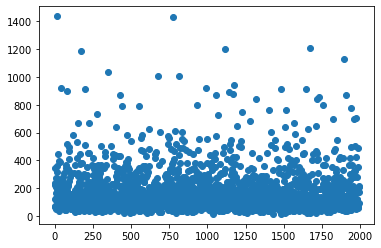

In [36]:
import matplotlib.pyplot as plt

plotx = []
ploty = []
dist = np.zeros(1500)
for i in range(len(train_featurs)):
  plotx.append(i)
  ploty.append(len(train_featurs[i][0]))
  dist[len(train_featurs[i][0])] += 1
plt.scatter(plotx, ploty)


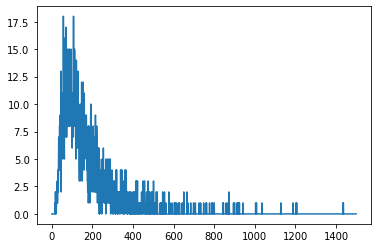

In [38]:
plotx = []
ploty = []
for i in range(len(dist)):
  plotx.append(i)
  ploty.append(dist[i])
plt.plot(plotx, ploty)


In [45]:
fixed_train_features = []
for i in train_featurs:
  fixed_data = np.zeros((400, 10))
  fixed_data[0:i.T.shape[0], :] = i.T[0:400, :]

  fixed_train_features.append(fixed_data)

In [72]:
train_y = []

for i in file_names:
  train_y.append(parser(i)['label'])


In [73]:
from keras.utils import to_categorical

classes = ['A', 'H', 'N', 'W', 'S']
mapping = {}
for x in range(5):
  mapping[classes[x]] = x

for x in range(len(train_y)):
  train_y[x] = mapping[train_y[x]]

train_y = to_categorical(train_y)


In [74]:
train_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [75]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
train_x = []
for i in fixed_train_features:
  train_x.append(sc.fit_transform(i))

In [65]:
pd.DataFrame(fixed_train_features[0])

,0,1,2,3,4,5,6,7,8,9
0,-451.044155,86.410245,26.528986,26.166476,1.310590,10.359695,3.730190,-0.280607,-3.037299,-0.881331
1,-297.271047,96.232800,-1.004034,25.945474,-14.447126,29.904465,6.883840,5.443380,-14.870616,-2.326540
2,-212.433572,88.209644,-31.023980,30.831949,-9.888255,47.258916,12.666883,9.275661,-17.200699,5.179867
3,-176.532551,98.294995,-44.291125,12.095507,-17.996642,53.827365,8.583148,15.726745,-22.484549,6.015056
4,-158.493271,122.719836,-63.254633,-13.117135,-29.225837,48.976732,-13.657953,19.503515,-20.562037,3.354300
...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
pd.DataFrame(train_x[0])

,0,1,2,3,4,5,6,7,8,9
0,0.226226,0.674829,0.633876,0.458936,0.671054,0.393984,0.653743,0.290647,0.639630,0.342753
1,0.490026,0.714678,0.462885,0.457269,0.520243,0.525535,0.678772,0.350234,0.492046,0.326871
2,0.635566,0.682129,0.276449,0.494119,0.563874,0.642344,0.724669,0.390128,0.462985,0.409366
3,0.697155,0.723044,0.194055,0.352822,0.486272,0.686555,0.692259,0.457283,0.397086,0.418545
4,0.728102,0.822133,0.076284,0.162686,0.378802,0.653906,0.515744,0.496599,0.421063,0.389303
...,...,...,...,...,...,...,...,...,...,...
395,1.000000,0.324272,0.469120,0.261606,0.658511,0.324255,0.624139,0.293568,0.677511,0.352439
396,1.000000,0.324272,0.469120,0.261606,0.658511,0.324255,0.624139,0.293568,0.677511,0.352439
397,1.000000,0.324272,0.469120,0.261606,0.658511,0.324255,0.624139,0.293568,0.677511,0.352439
398,1.000000,0.324272,0.469120,0.261606,0.658511,0.324255,0.624139,0.293568,0.677511,0.352439


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, train_size=0.8, shuffle=True)



# LSTM Model

##model 1

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn import metrics 
from keras.layers.embeddings import Embedding

model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(None, 10)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 128)               71168     
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 645       
Total params: 71,813
Trainable params: 71,813
Non-trainable params: 0
_________________________________________________________________
None


In [131]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=50,
                  validation_data=(x_test, y_test))


Epoch 1/50
13/13 [==============================] - 2s 71ms/step - loss: 0.1476 - accuracy: 0.3590 - val_loss: 0.1379 - val_accuracy: 0.4837
Epoch 2/50
13/13 [==============================] - 1s 65ms/step - loss: 0.1389 - accuracy: 0.4270 - val_loss: 0.1305 - val_accuracy: 0.4812
Epoch 3/50
13/13 [==============================] - 0s 31ms/step - loss: 0.1285 - accuracy: 0.5274 - val_loss: 0.1258 - val_accuracy: 0.5313
Epoch 4/50
13/13 [==============================] - 0s 30ms/step - loss: 0.1211 - accuracy: 0.5689 - val_loss: 0.1248 - val_accuracy: 0.5338
Epoch 5/50
13/13 [==============================] - 0s 31ms/step - loss: 0.1251 - accuracy: 0.5440 - val_loss: 0.1231 - val_accuracy: 0.5439
Epoch 6/50
13/13 [==============================] - 0s 30ms/step - loss: 0.1187 - accuracy: 0.5726 - val_loss: 0.1195 - val_accuracy: 0.5464
Epoch 7/50
13/13 [==============================] - 0s 30ms/step - loss: 0.1203 - accuracy: 0.5547 - val_loss: 0.1233 - val_accuracy: 0.5414
Epoch 8/50
13

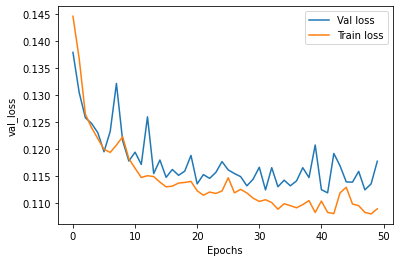

In [132]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


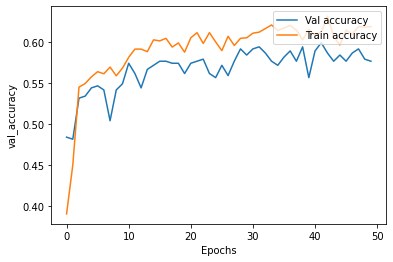

In [133]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig('plot_accuracy.png')
plt.show()


##model 2

In [140]:
model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(None, 10)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 128)               71168     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_52 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_54 (Dense)             (None, 5)                 165       
Total params: 92,037
Trainable params: 92,037
Non-trainable params: 0
_________________________________________________________________
None


In [144]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=100,
                  validation_data=(x_test, y_test))


Epoch 1/100
13/13 [==============================] - 1s 42ms/step - loss: 0.1082 - accuracy: 0.6132 - val_loss: 0.1125 - val_accuracy: 0.5915
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1058 - accuracy: 0.6288 - val_loss: 0.1160 - val_accuracy: 0.5739
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1054 - accuracy: 0.6288 - val_loss: 0.1140 - val_accuracy: 0.5840
Epoch 4/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1040 - accuracy: 0.6313 - val_loss: 0.1149 - val_accuracy: 0.5689
Epoch 5/100
13/13 [==============================] - 0s 32ms/step - loss: 0.1062 - accuracy: 0.6245 - val_loss: 0.1140 - val_accuracy: 0.5789
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1034 - accuracy: 0.6395 - val_loss: 0.1126 - val_accuracy: 0.5840
Epoch 7/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1030 - accuracy: 0.6414 - val_loss: 0.1122 - val_accuracy: 0.5865
Epoch 

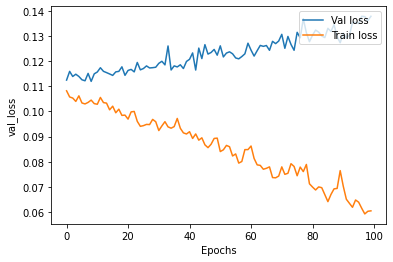

In [145]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


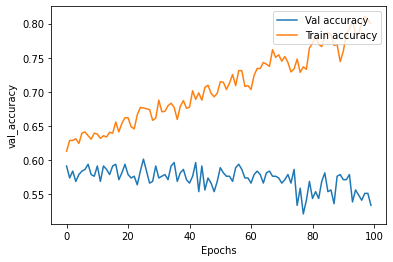

In [146]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig('plot_accuracy.png')
plt.show()

In [180]:
model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(None, 10), dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 128)               71168     
_________________________________________________________________
dense_71 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_73 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_74 (Dense)             (None, 5)                 165       
Total params: 92,037
Trainable params: 92,037
Non-trainable params: 0
_________________________________________________

In [148]:
history=model.fit(x_train, y_train, 
                  batch_size=128, 
                  epochs=100,
                  validation_data=(x_test, y_test))


Epoch 1/100
13/13 [==============================] - 2s 70ms/step - loss: 0.1560 - accuracy: 0.2879 - val_loss: 0.1441 - val_accuracy: 0.3709
Epoch 2/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1441 - accuracy: 0.3866 - val_loss: 0.1404 - val_accuracy: 0.3759
Epoch 3/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1385 - accuracy: 0.4249 - val_loss: 0.1298 - val_accuracy: 0.5188
Epoch 4/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1312 - accuracy: 0.5266 - val_loss: 0.1304 - val_accuracy: 0.5113
Epoch 5/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1276 - accuracy: 0.5483 - val_loss: 0.1301 - val_accuracy: 0.5038
Epoch 6/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1254 - accuracy: 0.5451 - val_loss: 0.1266 - val_accuracy: 0.5338
Epoch 7/100
13/13 [==============================] - 0s 31ms/step - loss: 0.1253 - accuracy: 0.5548 - val_loss: 0.1199 - val_accuracy: 0.5564
Epoch 

##model 3

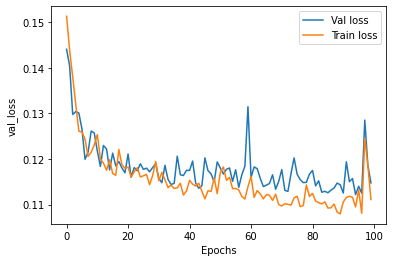

In [149]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


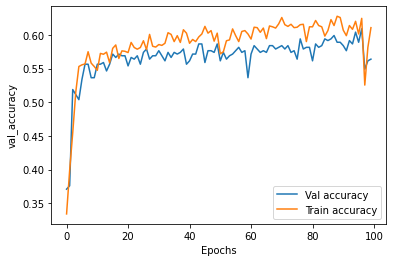

In [152]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('plot_accuracy.png')
plt.show()

# Split Male and Femle Voice

In [154]:
train_x_male = []
train_x_female = []
train_y_male = []
train_y_female = []

for i in range(len(file_names)):
  meta = parser(file_names[i])
  if meta['gender'] == 'M':
    train_x_male.append(train_x[i])
    train_y_male.append(train_y[i])
  if meta['gender'] == 'F':
    train_x_female.append(train_x[i])
    train_y_female.append(train_y[i])

In [171]:
x_train_male, x_test_male, y_train_male, y_test_male = train_test_split(train_x_male, train_y_male, train_size=0.8, shuffle=True)
x_train_female, x_test_female, y_train_female, y_test_female = train_test_split(train_x_female, train_y_female, train_size=0.8, shuffle=True)


In [175]:
x_train_male = np.array(x_train_male)
y_train_male = np.array(y_train_male)
x_test_male = np.array(x_test_male)
y_test_male = np.array(y_test_male)
history=model.fit(x_train_male, y_train_male, 
                  batch_size=128, 
                  epochs=70,
                  validation_data=(x_test_male, y_test_male))


Epoch 1/70
8/8 [==============================] - 2s 101ms/step - loss: 0.1518 - accuracy: 0.3182 - val_loss: 0.1289 - val_accuracy: 0.4069
Epoch 2/70
8/8 [==============================] - 0s 32ms/step - loss: 0.1365 - accuracy: 0.4274 - val_loss: 0.1281 - val_accuracy: 0.4199
Epoch 3/70
8/8 [==============================] - 0s 29ms/step - loss: 0.1345 - accuracy: 0.4565 - val_loss: 0.1275 - val_accuracy: 0.5022
Epoch 4/70
8/8 [==============================] - 0s 28ms/step - loss: 0.1320 - accuracy: 0.5138 - val_loss: 0.1190 - val_accuracy: 0.5974
Epoch 5/70
8/8 [==============================] - 0s 29ms/step - loss: 0.1240 - accuracy: 0.5621 - val_loss: 0.1104 - val_accuracy: 0.6364
Epoch 6/70
8/8 [==============================] - 0s 29ms/step - loss: 0.1187 - accuracy: 0.5879 - val_loss: 0.1047 - val_accuracy: 0.6364
Epoch 7/70
8/8 [==============================] - 0s 29ms/step - loss: 0.1150 - accuracy: 0.6018 - val_loss: 0.1042 - val_accuracy: 0.6364
Epoch 8/70
8/8 [==========

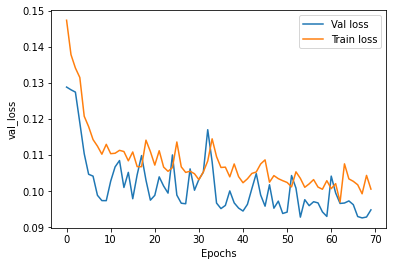

In [176]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


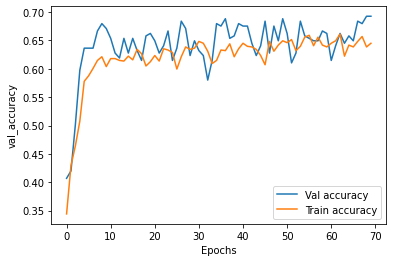

In [177]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('plot_accuracy.png')
plt.show()

In [183]:
x_train_female = np.array(x_train_female)
y_train_female = np.array(y_train_female)
x_test_female = np.array(x_test_female)
y_test_female = np.array(y_test_female)
history=model.fit(x_train_female, y_train_female, 
                  batch_size=128, 
                  epochs=100,
                  validation_data=(x_test_female, y_test_female))


Epoch 1/100
6/6 [==============================] - 0s 58ms/step - loss: 0.1226 - accuracy: 0.5365 - val_loss: 0.1213 - val_accuracy: 0.5655
Epoch 2/100
6/6 [==============================] - 0s 38ms/step - loss: 0.1222 - accuracy: 0.5395 - val_loss: 0.1222 - val_accuracy: 0.5536
Epoch 3/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1221 - accuracy: 0.5455 - val_loss: 0.1189 - val_accuracy: 0.5655
Epoch 4/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1177 - accuracy: 0.5529 - val_loss: 0.1230 - val_accuracy: 0.5536
Epoch 5/100
6/6 [==============================] - 0s 34ms/step - loss: 0.1189 - accuracy: 0.5574 - val_loss: 0.1277 - val_accuracy: 0.5298
Epoch 6/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1251 - accuracy: 0.5306 - val_loss: 0.1219 - val_accuracy: 0.5536
Epoch 7/100
6/6 [==============================] - 0s 33ms/step - loss: 0.1237 - accuracy: 0.5335 - val_loss: 0.1226 - val_accuracy: 0.5298
Epoch 8/100
6/6 [===

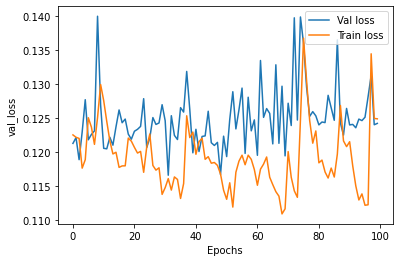

In [184]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_loss']
accuracval_accuracy = history.history['loss']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_loss')
plt.legend(['Val loss','Train loss'], loc='upper right')
plt.savefig('plot_loss.png')
plt.show()


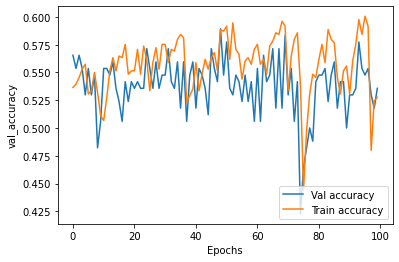

In [185]:
from matplotlib import pyplot as plt

val_accuracy = history.history['val_accuracy']
accuracval_accuracy = history.history['accuracy']
plt.plot(val_accuracy)
plt.plot(accuracval_accuracy)
plt.xlabel('Epochs')
plt.ylabel('val_accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='lower right')
plt.savefig('plot_accuracy.png')
plt.show()

In [188]:
print(x_train_male.shape)
print(x_train_female.shape)

(924, 400, 10)
(671, 400, 10)
